In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
import astropy.units as u
import astropy.constants as c
import scipy.integrate
import scipy.special
from scipy.optimize import minimize_scalar

     fun: 3.4215398721402983
    nfev: 17
     nit: 9
 success: True
       x: 17.842963489766806

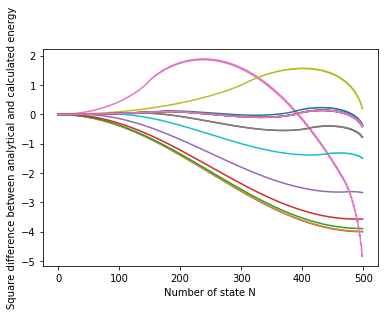

In [79]:
def error(L, full_output = False):
    x, dx = np.linspace(-L, L, 500, retstep=True)
    NG = len(x)
    V = x**2
    vals, vecs = eigh_tridiagonal(2 + V*dx**2, -np.ones(NG-1))
    expected_energy = (2*np.arange(NG)+1)*dx**2
    if full_output:
        return x, vals, vecs
    else:
        plt.plot(expected_energy - vals)
        plt.xlabel("Number of state N")
        plt.ylabel("Square difference between analytical and calculated energy")
        return np.sum((vals - expected_energy)**2)
minimization_result = minimize_scalar(error)
minimization_result

3.4215398721402983

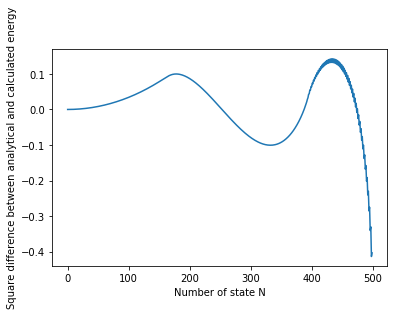

In [80]:
error(minimization_result.x)

In [81]:
def analytical_QHO(x, m = 1, w = 1, hbar = 1):
    return (m*w/hbar/np.pi)**0.25/np.sqrt(2**index*scipy.special.factorial(index))*np.exp(-m*w*x*x/2/hbar)*scipy.special.hermite(index)(np.sqrt(m*w/hbar)*x)

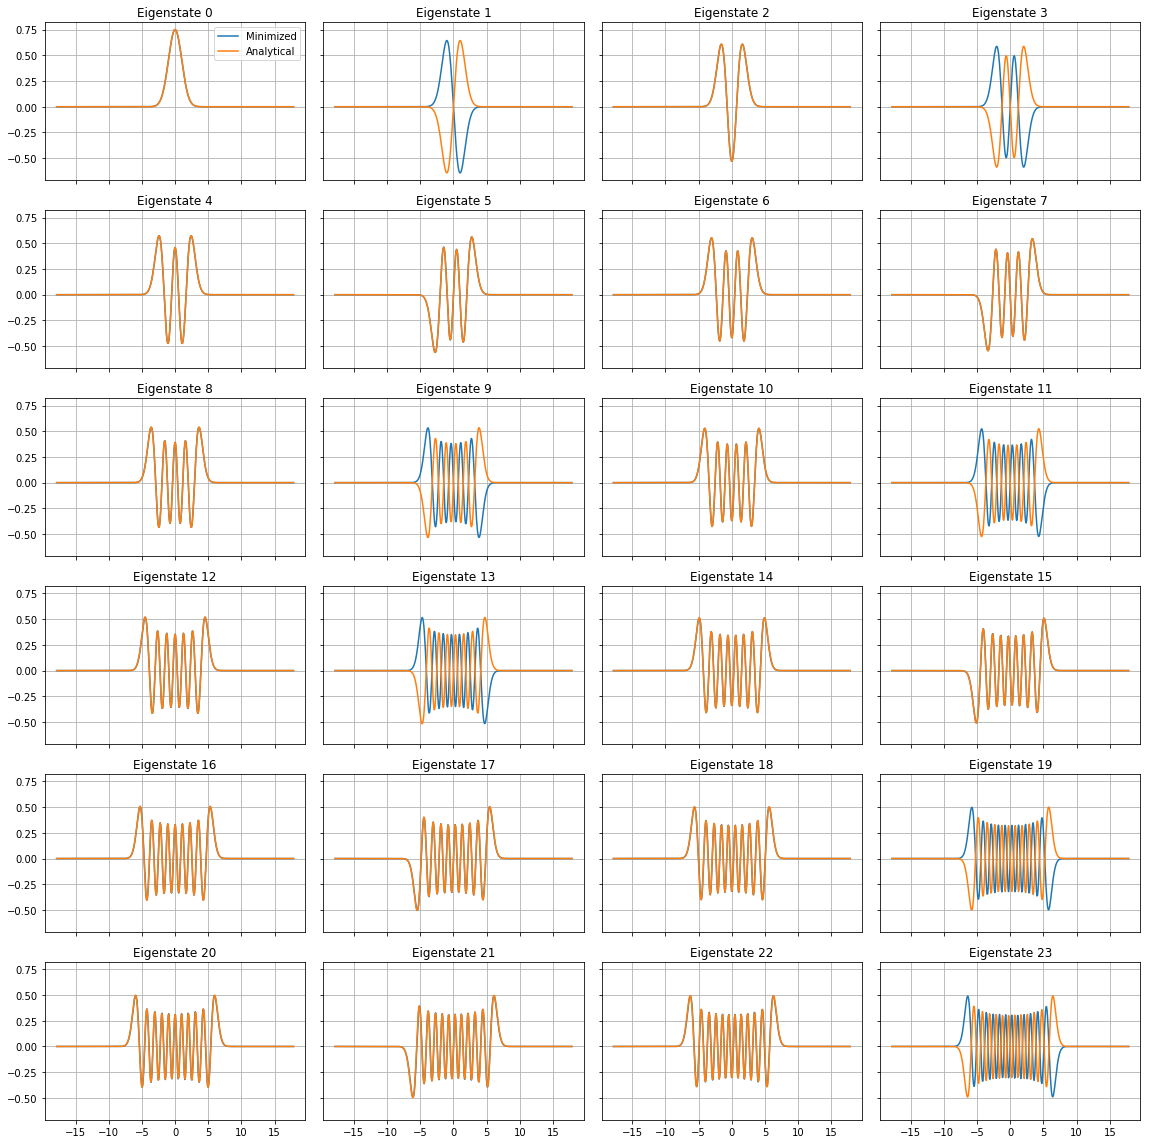

In [82]:
x, vals, vecs = error(minimization_result.x, full_output=True)
fig, ax = plt.subplots(24//4, 4, figsize=(16, 2/3*24), sharex=True, sharey=True)
for index, vec in enumerate(vecs.T[:24]):
    i = index //4
    j = index % 4
    analytical = analytical_QHO(x)
    vec =  vec / np.sqrt(scipy.integrate.simps(vec**2, x))
    ax[i,j].plot(x, vec, label="Minimized")
    ax[i,j].set_title(f"Eigenstate {index}")
    ax[i,j].plot(x, analytical, label="Analytical")
    ax[i,j].grid()
ax[0, 0].legend(loc='best')
plt.tight_layout()

In [83]:
def flip(calculated, analytical):
    positive_sign = np.abs(calculated - analytical).sum()
    negative_sign = np.abs(calculated + analytical).sum()
    if positive_sign < negative_sign:
        return calculated
    else:
        return -calculated

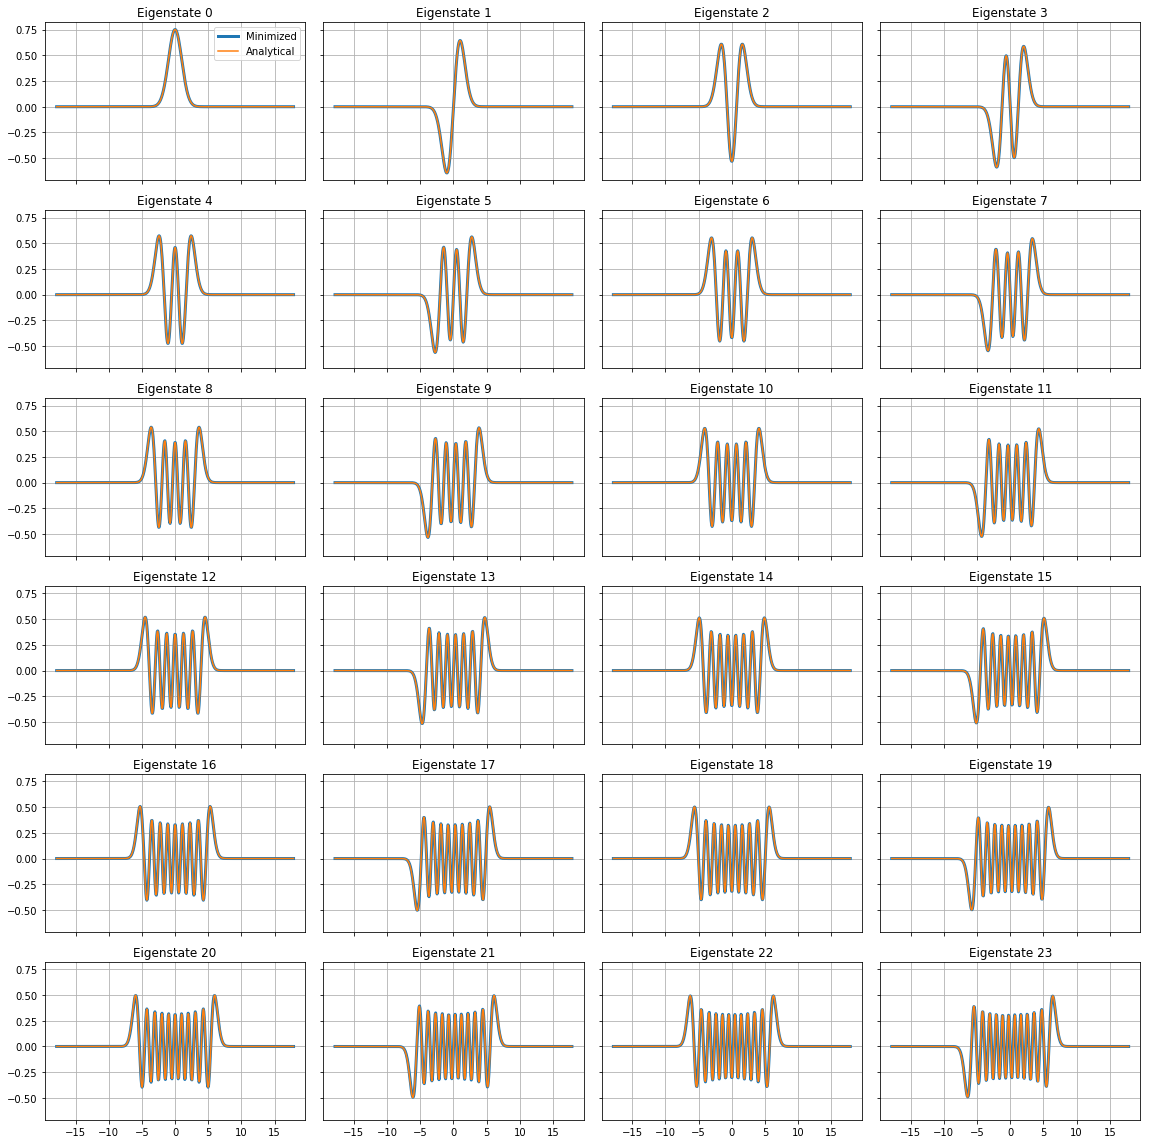

In [84]:
x, vals, vecs = error(minimization_result.x, full_output=True)
fig, ax = plt.subplots(24//4, 4, figsize=(16, 2/3*24), sharex=True, sharey=True)
for index, vec in enumerate(vecs.T[:24]):
    i = index //4
    j = index % 4
    analytical = analytical_QHO(x)
    vec =  vec / np.sqrt(scipy.integrate.simps(vec**2, x))
    ax[i,j].plot(x, flip(vec, analytical), label="Minimized", lw = 3)
    ax[i,j].set_title(f"Eigenstate {index}")
    ax[i,j].plot(x, analytical, label="Analytical")
    ax[i,j].grid()
ax[0, 0].legend(loc='best')
plt.tight_layout()

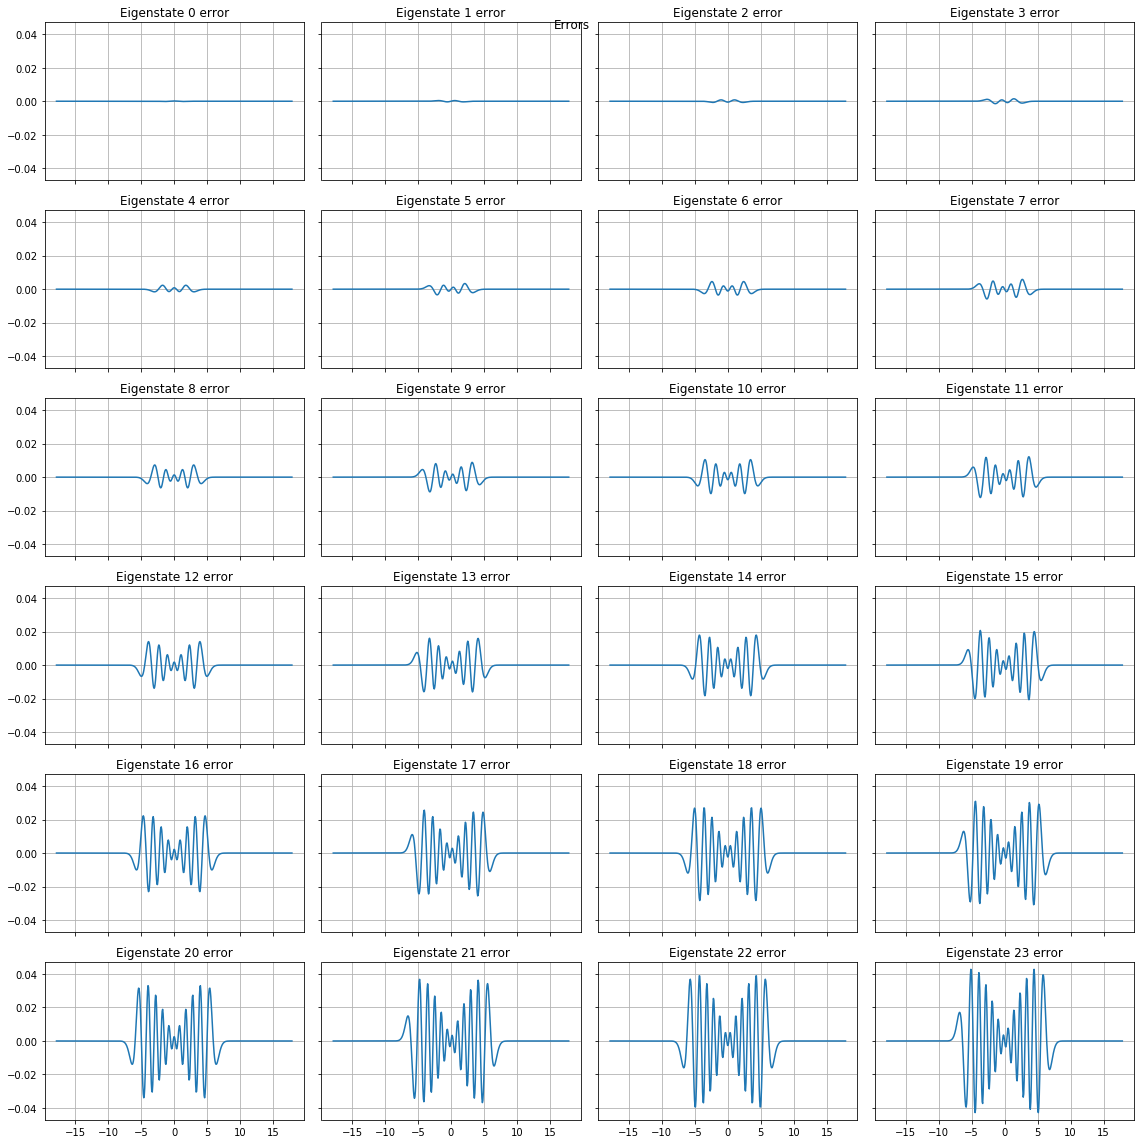

In [90]:
fig, ax = plt.subplots(24//4, 4, figsize=(16, 2/3*24), sharex=True, sharey=True)
fig.suptitle("Errors")
for index, vec in enumerate(vecs.T[:24]):
    i = index //4
    j = index % 4
    analytical = analytical_QHO(x)
    vec =  vec / np.sqrt(scipy.integrate.simps(vec**2, x))
    ax[i,j].set_title(f"Eigenstate {index} error")
    ax[i,j].plot(x, flip(vec, analytical) - analytical)
    ax[i,j].grid()
plt.tight_layout()

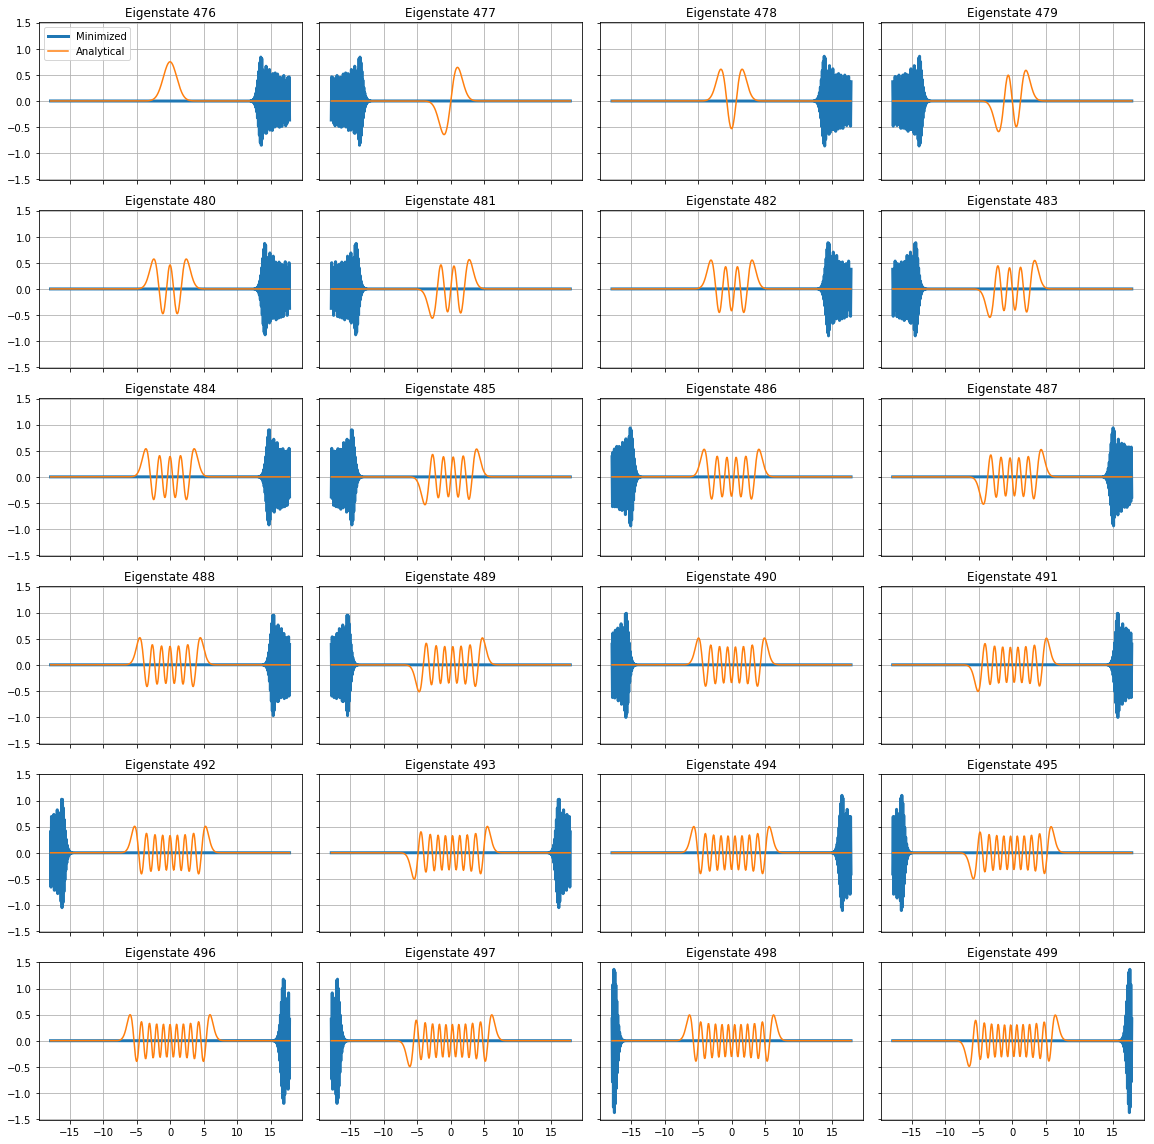

In [91]:
x, vals, vecs = error(minimization_result.x, full_output=True)
fig, ax = plt.subplots(24//4, 4, figsize=(16, 2/3*24), sharex=True, sharey=True)
for index, vec in enumerate(vecs.T[-24:]):
    i = index //4
    j = index % 4
    analytical = analytical_QHO(x)
    vec =  vec / np.sqrt(scipy.integrate.simps(vec**2, x))
    ax[i,j].plot(x, flip(vec, analytical), label="Minimized", lw = 3)
    ax[i,j].set_title(f"Eigenstate {len(vecs) - 24 +index}")
    ax[i,j].plot(x, analytical, label="Analytical")
    ax[i,j].grid()
ax[0, 0].legend(loc='best')
plt.tight_layout()

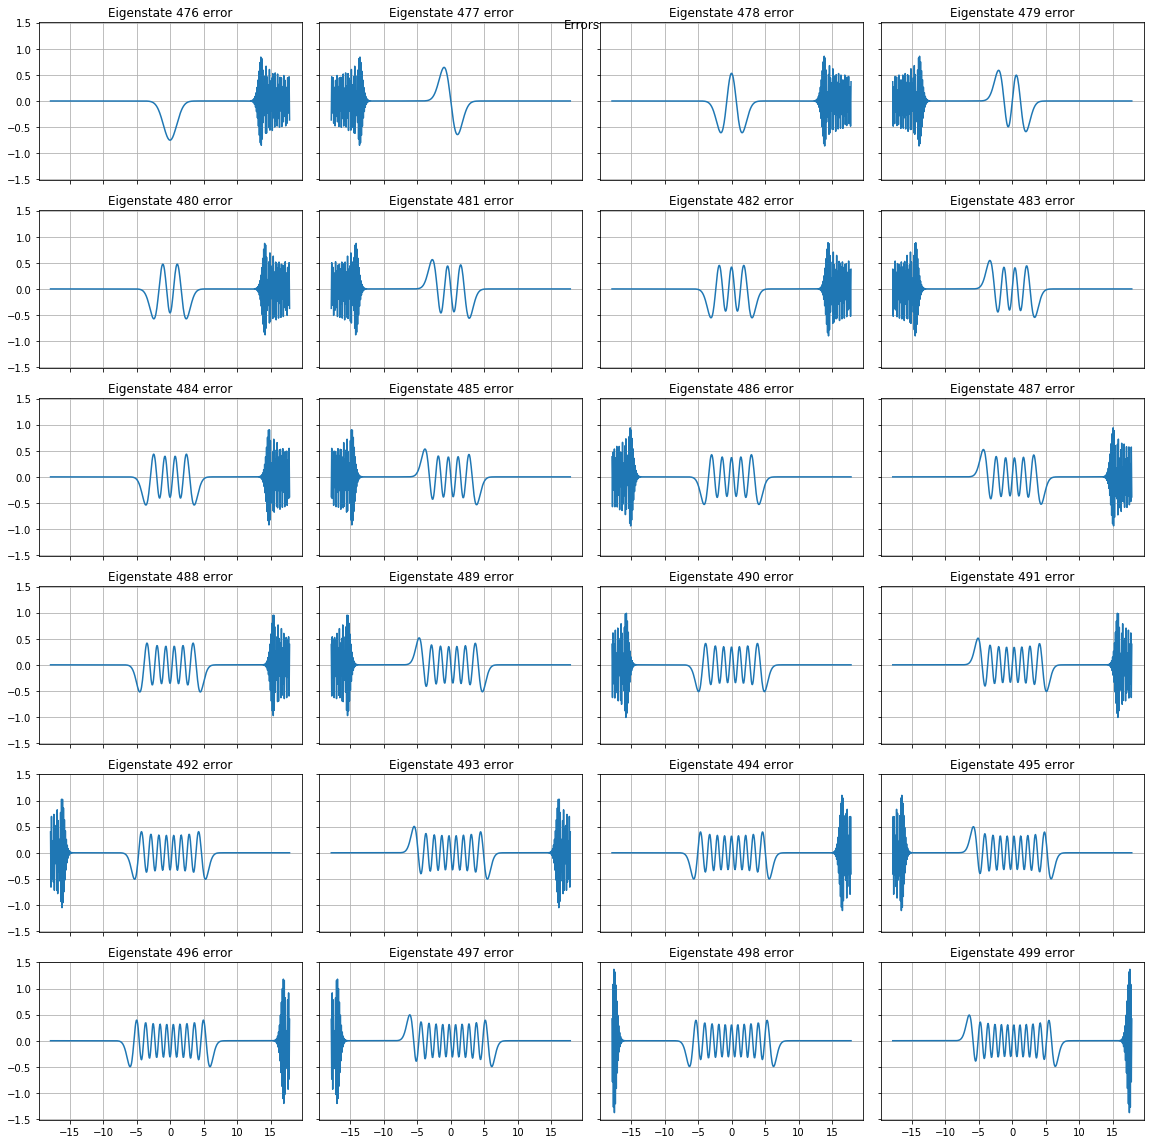

In [89]:
fig, ax = plt.subplots(24//4, 4, figsize=(16, 2/3*24), sharex=True, sharey=True)
fig.suptitle("Errors")
for index, vec in enumerate(vecs.T[-24:]):
    i = index //4
    j = index % 4
    analytical = analytical_QHO(x)
    vec =  vec / np.sqrt(scipy.integrate.simps(vec**2, x))
    ax[i,j].set_title(f"Eigenstate {len(vecs) - 24 +index} error")
    ax[i,j].plot(x, flip(vec, analytical) - analytical)
    ax[i,j].grid()
plt.tight_layout()